# Workshop RL-01: Introduction

## Reinforcement Learning
* https://www.analyticsvidhya.com/blog/2017/01/introduction-to-reinforcement-learning-implementation/
* https://joshgreaves.com/reinforcement-learning/understanding-rl-the-bellman-equations/

## Worked Example: Frozen-Lake Q-Learning

In [127]:
import gym
import numpy as np

In [128]:
LEARNING_RATE = 0.80
DISCOUNT_FACTOR = 0.95
N_TRAINING_EPISODES = 5000

In [129]:
env = gym.make("FrozenLake-v0")
N_STATES = env.observation_space.n
N_ACTIONS = env.action_space.n

In [130]:
# initialize the Q-table - this should have one entry for each
#   state, action tuple, hence shape=(N_STATES)
Q_table = np.zeros([N_STATES, N_ACTIONS])
Q_table.shape

(16, 4)

In [131]:
# reset the environment and reward
episode_rewards = []
    
# play however-many training episodes
for episode in range(N_TRAINING_EPISODES):
        
    state = env.reset()
    episode_reward = 0.0
    done = False
        
    while not done:
        
        # choose the action with the highest Q-value for the state
        action = np.argmax(Q_table[state, :]\
                + np.random.randn(1, N_ACTIONS)*(1.0 / (episode+1)))
        # the second line adds noise to the choice of action - this is
        # to encourage exploration

        # execute the action and go to next state
        state_, reward, done, _ = env.step(action)

        # update the Q table according to the Bellman Equation
        Q_table[state, action] = Q_table[state, action] +\
            LEARNING_RATE * (reward + DISCOUNT_FACTOR * np.max(Q_table[state_, :]) - Q_table[state, action])

        episode_reward += reward
        state = state_

    episode_rewards.append(episode_reward)

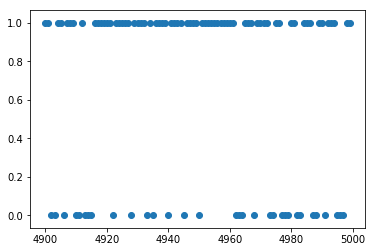

In [133]:
# plot the reward over time
import matplotlib.pyplot as plt
episodes = range(N_TRAINING_EPISODES)
plt.scatter(episodes[-100:], episode_rewards[-100:])
plt.show()